In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

## Exercise 1

In [3]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

## Exercise 2

In [4]:
print(im_org.shape)

(512, 512)


## Exercise 3

In [5]:
print(im_org.dtype)

uint8


## Exercise 4

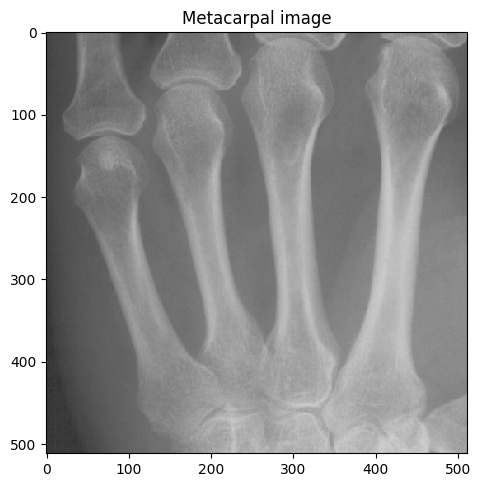

In [6]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

## Exercise 5+6

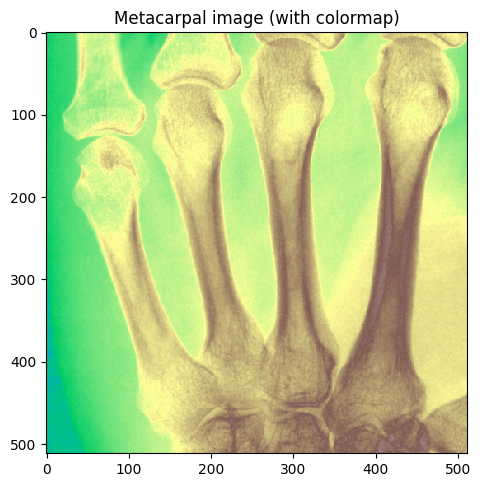

In [12]:
io.imshow(im_org, cmap="terrain")
plt.title('Metacarpal image (with colormap)')
io.show()

## Exercise 7

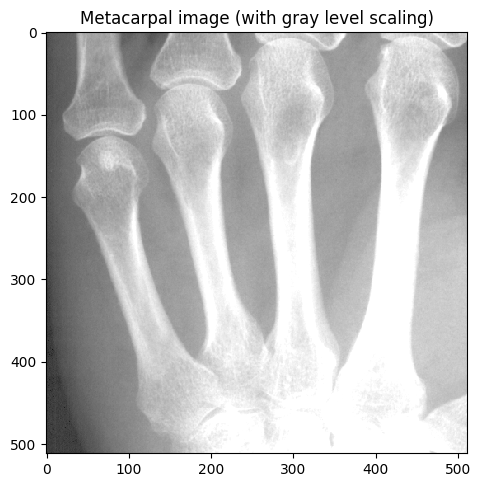

In [13]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

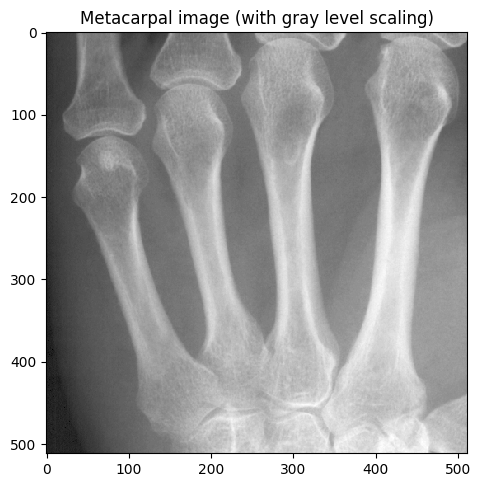

In [18]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()



## Exercise 8

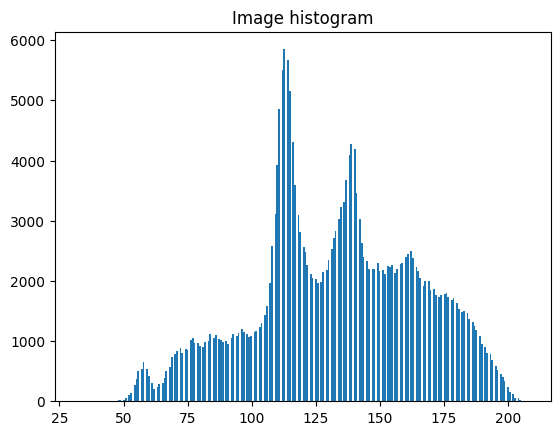

In [19]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

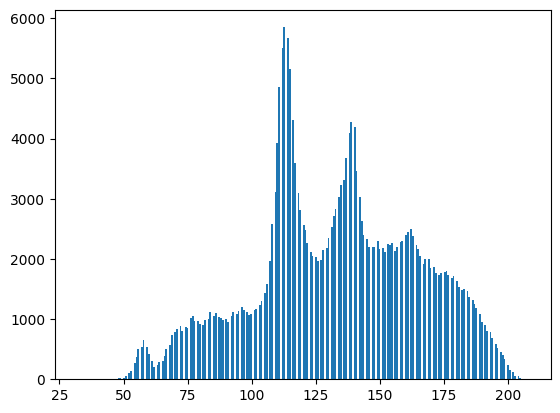

In [20]:
h = plt.hist(im_org.ravel(), bins=256)

In [21]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [22]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


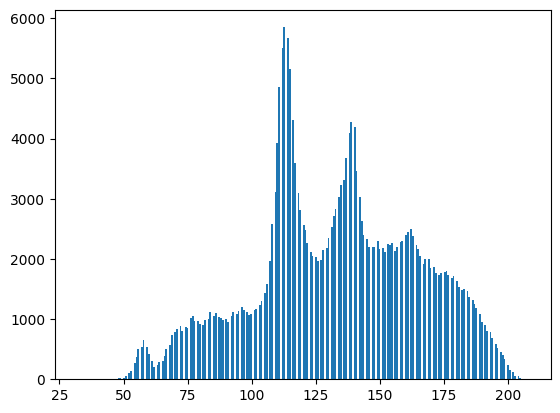

In [23]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

## Exercise 9

In [26]:
val = np.argmax(y)
bin_left = h[1][val]
bin_right = h[1][val + 1]
print(f"Bin edges: {bin_left} to {bin_right} are most common")

Bin edges: 112.4375 to 113.125 are most common


## Exercise 10

In [28]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


## Exercise 11

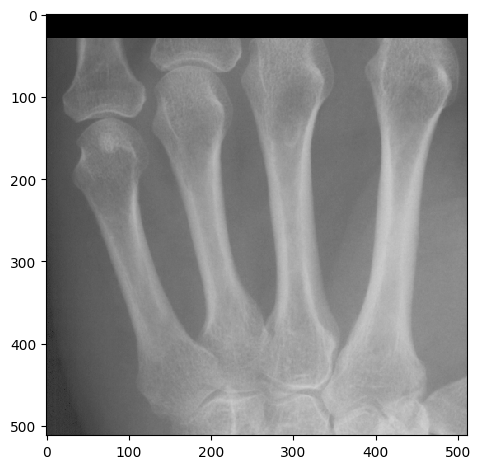

In [30]:
im_org[:30] = 0
io.imshow(im_org)
io.show()
#the 30 first rows are replaced with 0

## Exercise 12

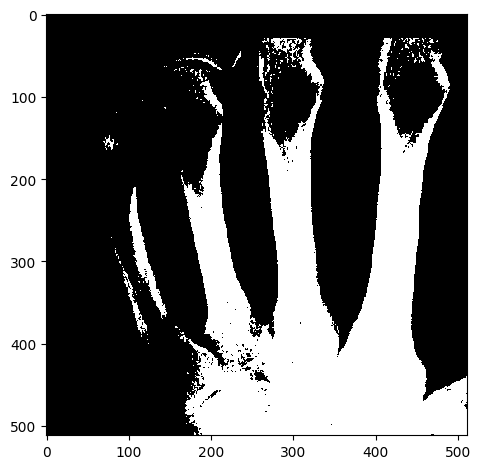

In [31]:
mask = im_org > 150
io.imshow(mask)
io.show()
#They are black where the image value is under 150

## Exercise 13

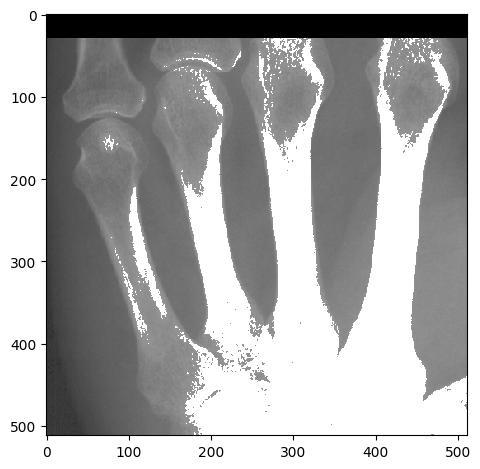

In [32]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

## Exercise 14

In [55]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "ardeche.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)

print(im_org.dtype)

(600, 800, 3)
uint8


## Exercise 15

In [34]:
r=110
c=90
print(im_org[r, c, 0])
print(im_org[r, c, 1])
print(im_org[r, c, 2])

119
178
238


## Exercise 16!

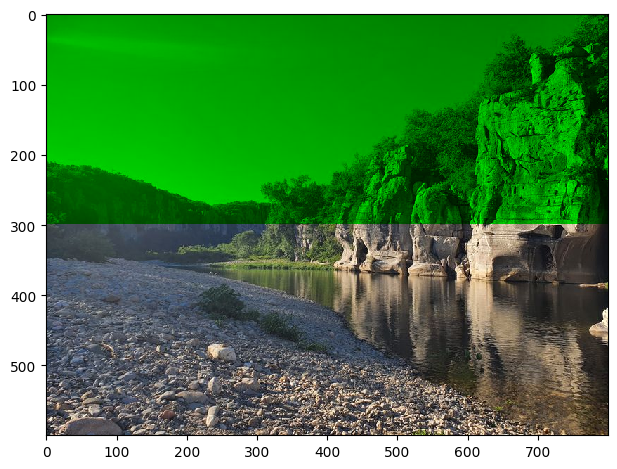

In [56]:
rows = im_org.shape[0]
r_2 = rows//2
im_org[:r_2, :, [0,2]] = 0

io.imshow(im_org)
io.show()


## Exercise 17

(1200, 1920, 3)
uint8


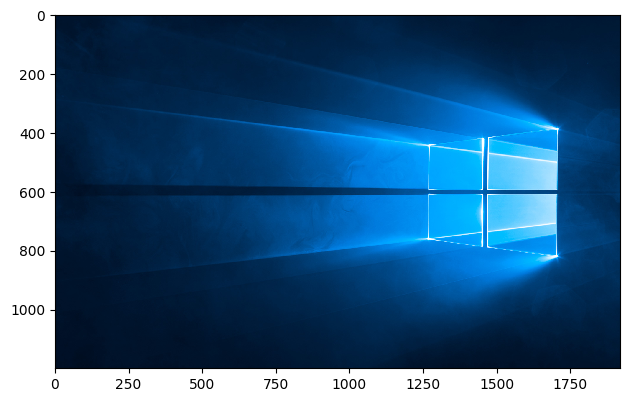

In [75]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "img0.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)

print(im_org.dtype)
io.imshow(im_org)
io.show()

In [64]:
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)


uint8


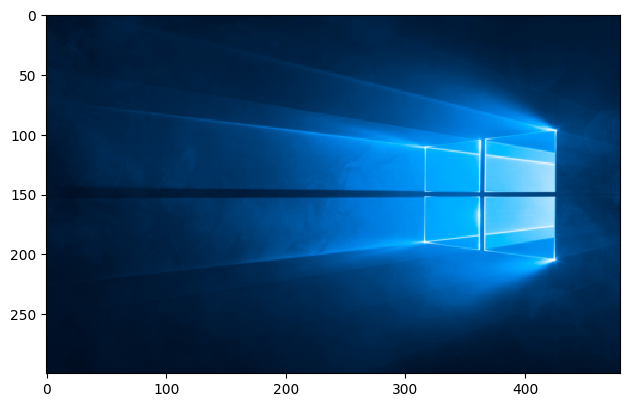

In [67]:
print(im_org.dtype)
io.imshow(image_rescaled)
io.show()

## Exercise 18

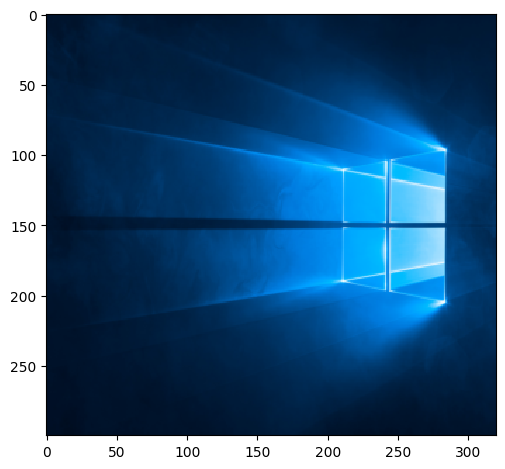

In [68]:
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)
io.imshow(image_resized)
io.show()

## Exercise 19

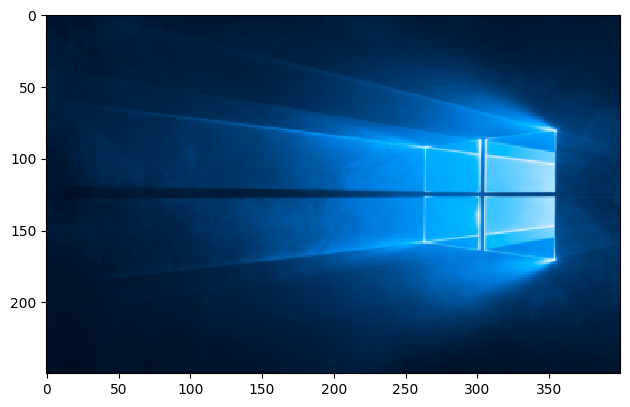

In [69]:
#Exercise 19: Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?
image_resized = resize(im_org, (im_org.shape[0] * 400 // im_org.shape[1],
                       400),
                       anti_aliasing=True)
io.imshow(image_resized)
io.show()

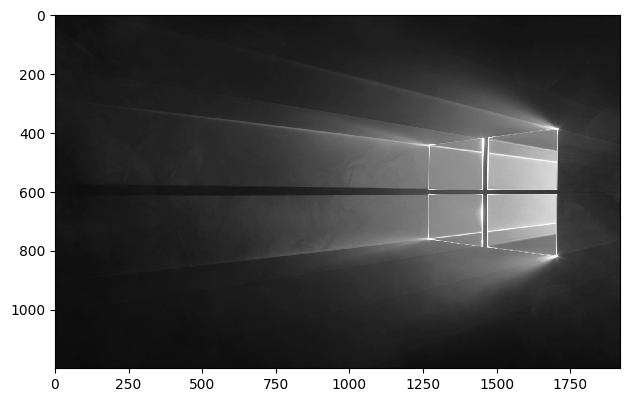

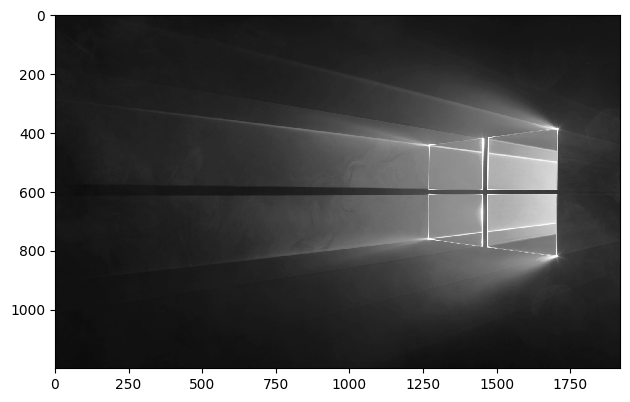

In [73]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)
io.imshow(im_gray)
io.show()
io.imshow(im_byte)
io.show()


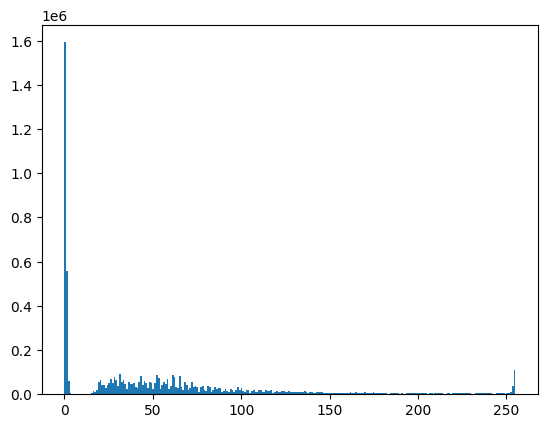

In [76]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

## Exercise 22

(3024, 4032, 3)
uint8


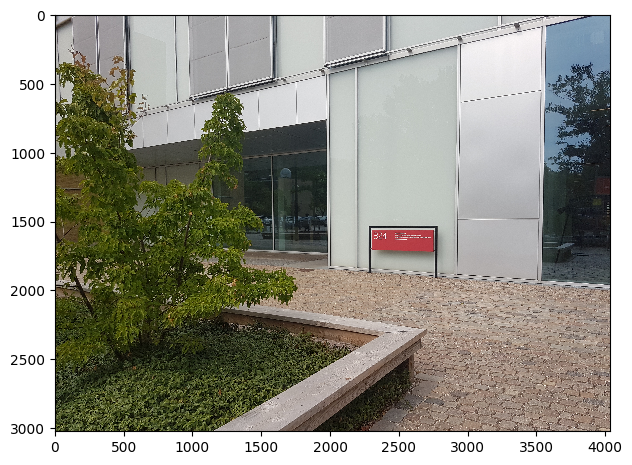

In [77]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "DTUSign1.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)

print(im_org.dtype)
io.imshow(im_org)
io.show()

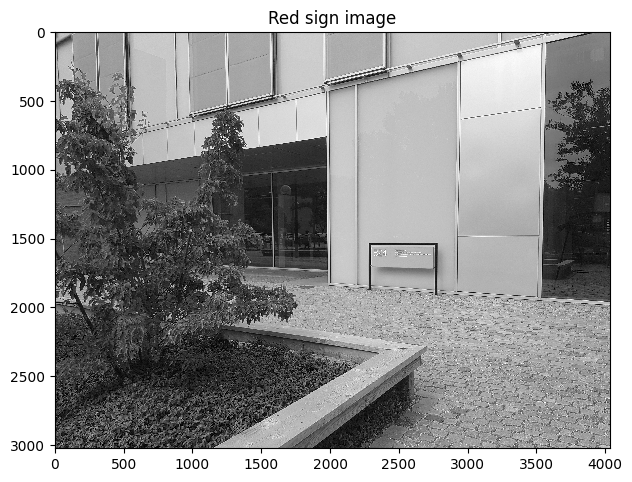

In [82]:
r_comp = im_org[:, :, 0]
io.imshow(r_comp)
plt.title('Red sign image')
io.show()

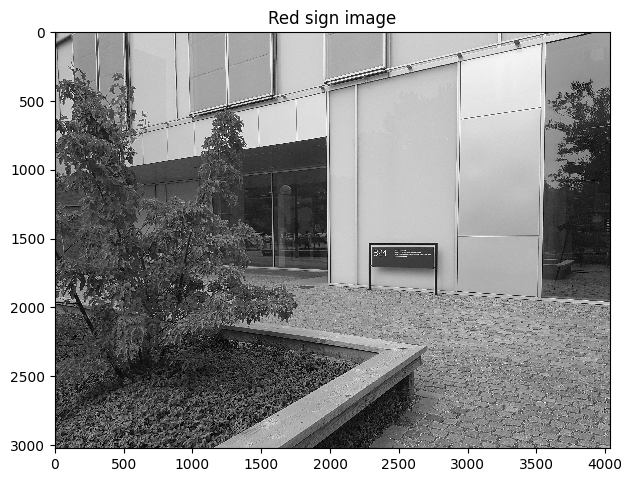

In [83]:
r_comp = im_org[:, :, 1]
io.imshow(r_comp)
plt.title('Red sign image')
io.show()

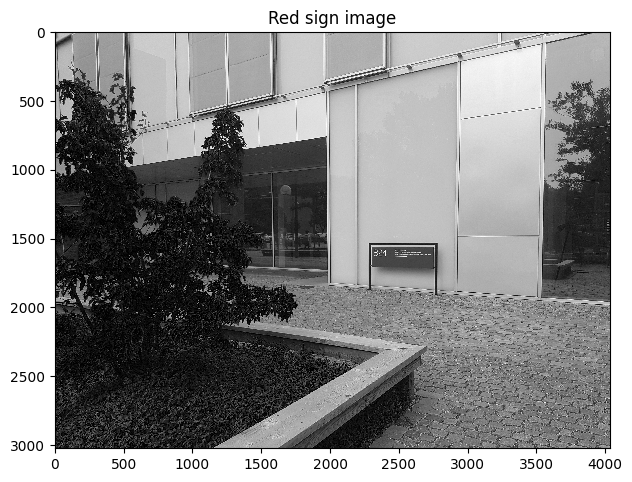

In [84]:
r_comp = im_org[:, :, 2]
io.imshow(r_comp)
plt.title('Red sign image')
io.show()

## Exercise 24

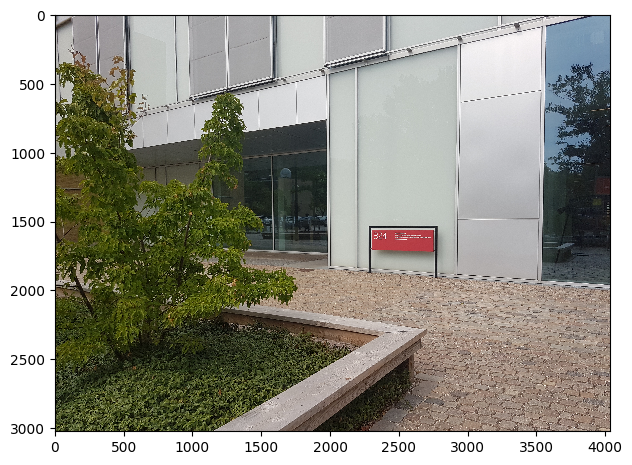

In [85]:
io.imshow(im_org)
io.show()

## Exercise 25

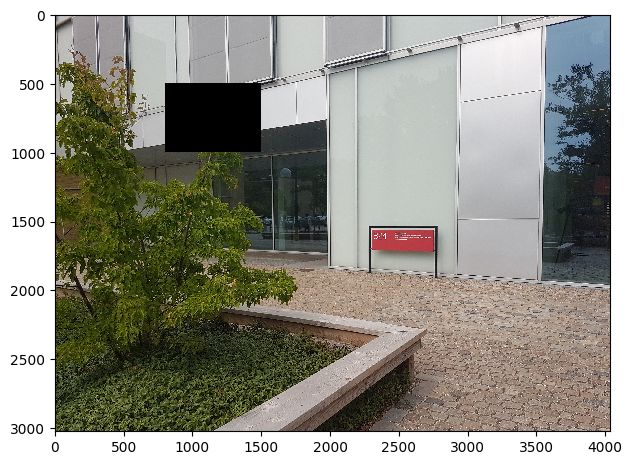

In [87]:
im_org[500:1000,800:1500,:] = 0
io.imshow(im_org)
io.show()
#save the image
out_dir = "data/"
out_name = "DTUSign1_modified.jpg"
io.imsave(out_dir + out_name, im_org)

## Exercise 27

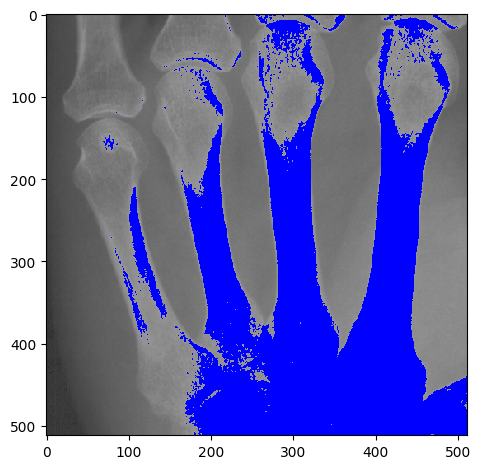

In [106]:
#load in metacarpals.png
im_org = io.imread(in_dir + "metacarpals.png")
im_color = color.gray2rgb(im_org)
#make every pixel value above 150 blue
mask = im_org > 150
im_color[mask] = [0, 0, 255]
io.imshow(im_color)
io.show()


## Exercise 28

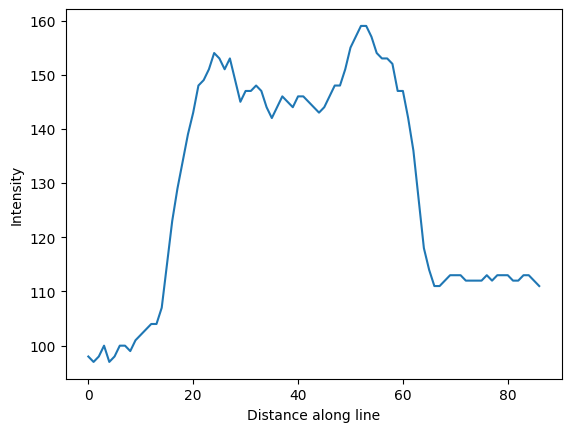

In [107]:
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

## Exercise 29

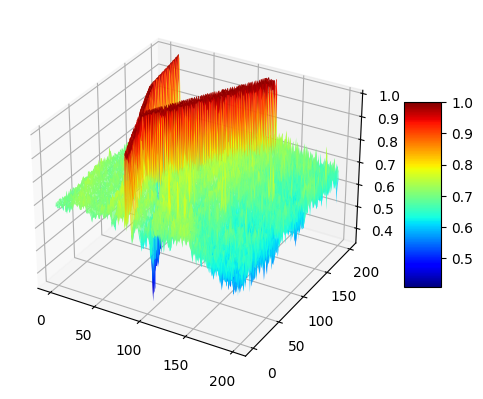

In [108]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Exercise 29

In [110]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [111]:
print(ds.pixel_array.shape)

(512, 512)
